**PREDICTION USING UNSUPERVISED MACHINE LEARNING** 

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
url ="https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing "
path ="https://drive.google.com/uc?export=download&id="+url.split('/')[-2]
iris =pd.read_csv(path)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris =iris.drop('Id',axis=1)

In [10]:
iris.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

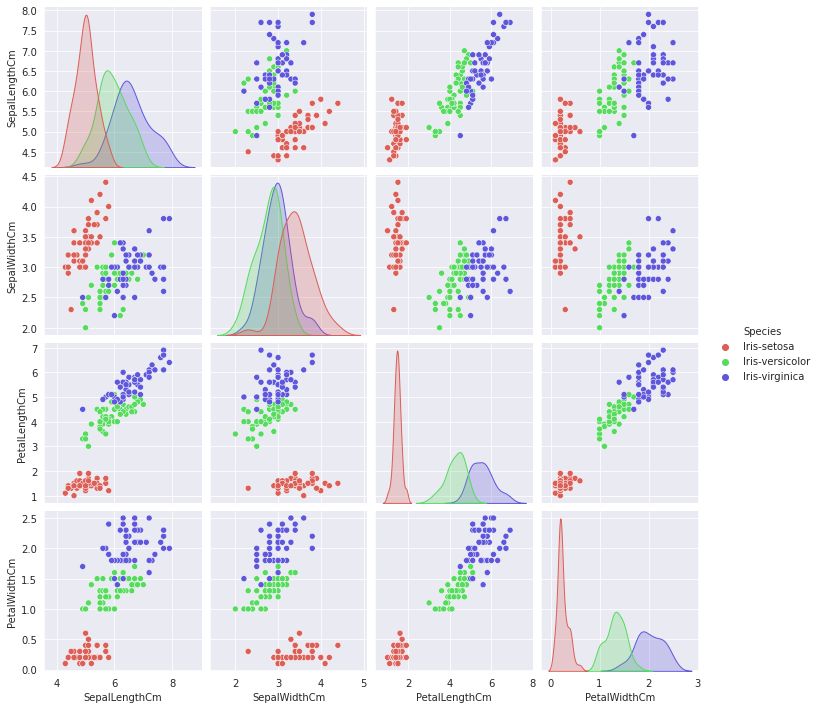

In [13]:
sns.set_style('darkgrid')
sns.pairplot(iris,hue='Species',palette='hls')

In [15]:
M= iris.drop(['Species'],axis=1)

In [16]:
M.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


k: 1 wcss: 680.8244
k: 2 wcss: 152.36870647733906
k: 3 wcss: 78.94084142614602
k: 4 wcss: 57.345409315718165
k: 5 wcss: 46.53558205128205
k: 6 wcss: 38.93873974358974
k: 7 wcss: 34.19068792479662
k: 8 wcss: 29.905374299825105
k: 9 wcss: 27.927882157034972


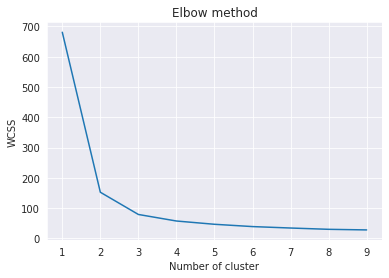

In [20]:
from sklearn.cluster import KMeans
M=iris.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10 ,random_state=0)
    kmeans.fit(M)
    wcss.append(kmeans.inertia_)
    print('k:',i,'wcss:',kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('Elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(M)

In [23]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 4, 0, 0, 4, 3, 4, 0, 4,
       0, 0, 0, 2, 0, 0, 0, 4, 4, 2, 0, 2, 4, 2, 0, 4, 2, 2, 0, 4, 4, 4,
       0, 2, 2, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

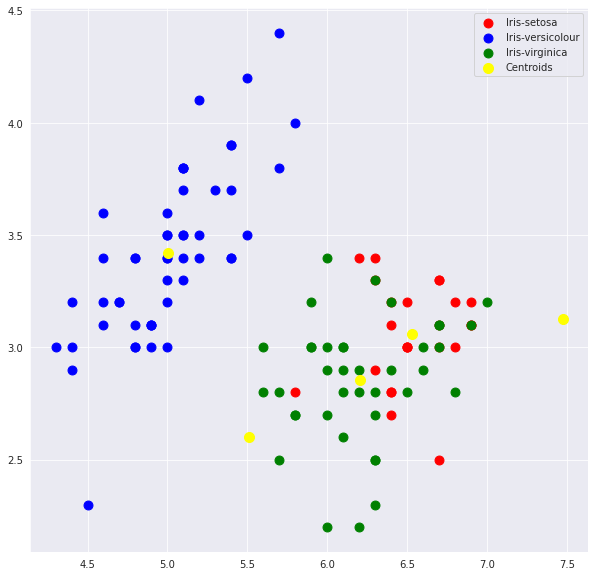

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(M[y_kmeans==0,0],M[y_kmeans==0,1],s=80,c='red',label='Iris-setosa')
plt.scatter(M[y_kmeans==1,0],M[y_kmeans==1,1],s=80,c='blue',label='Iris-versicolour')
plt.scatter(M[y_kmeans==2,0],M[y_kmeans==2,1],s=80,c='green',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend();